In [115]:
import numpy as np

def simulate_school(n_weeks = 52 * 2):

    S = [np.random.beta(80, 80)] + [0 for i in range(n_weeks)]
    C = [np.random.beta(80, 80)] + [0 for i in range(n_weeks)]
    G = [0] + [0 for i in range(n_weeks)]

    a_drink = [0.1] + [0 for i in range(n_weeks)]
    a_smoke = [0.02] + [0 for i in range(n_weeks)]
    a_date  = [0.05] + [0 for i in range(n_weeks)]
    a_slack = [1-a_drink[0]-a_smoke[0]-a_date[0]] + [0 for i in range(n_weeks)]

    MULT = 4e-3
    S_weekday_outcomes = np.array([1, -0.5])*MULT
    S_weekend_outcomes = np.array([0.4, -0.2, -0.2, -0.2, -0.2])*MULT
                                  
    C_weekday_outcomes = np.array([1, -0.2])*MULT
    C_weekend_outcomes = np.array([0.4, -0.2, -4, -2, -2])*MULT
    
    weekday_actions = []
    weekend_actions = []

    for t in range(0, n_weeks):

        # weekday distrib
        P_weekday = np.array([
            C[t],   # study
            1-C[t], # slack off
        ])

        P_weekend = np.array([
            C[t],   # study
            a_slack[t] * (1-C[t]), # slack off
            a_smoke[t] * (1-C[t]), # smoke
            a_date[t]  * (1-C[t]), # date
            a_drink[t] * (1-C[t]), # drink
        ])
        
        # https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1
        P_weekday /= sum(P_weekday)
        P_weekend /= sum(P_weekend)

        weekday_action = np.random.choice(2, p=P_weekday)
        weekend_action = np.random.choice(5, p=P_weekend)
        
        weekday_actions.append(weekday_action)
        weekend_actions.append(weekend_action)

        a_drink[t+1] = a_drink[t]
        a_smoke[t+1] = a_smoke[t]
        a_date [t+1] = a_date [t]
        a_slack[t+1] = a_slack[t]

        if weekend_action == 2:
            a_smoke[t+1] *= 2
        if weekend_action == 3:
            a_date[t+1] *= 2
        if weekend_action == 4:
            a_drink[t+1] *= 2

        a_drink[t+1] /= (a_drink[t+1] + a_smoke[t+1] + a_date[t+1] + a_slack[t+1])
        a_smoke[t+1] /= (a_drink[t+1] + a_smoke[t+1] + a_date[t+1] + a_slack[t+1])
        a_date [t+1] /= (a_drink[t+1] + a_smoke[t+1] + a_date[t+1] + a_slack[t+1])
        a_slack[t+1] /= (a_drink[t+1] + a_smoke[t+1] + a_date[t+1] + a_slack[t+1])

        S[t+1] = S[t] + \
                 S_weekday_outcomes[weekday_action] + \
                 S_weekend_outcomes[weekend_action]

        C[t+1] = C[t] + \
                 C_weekday_outcomes[weekday_action] + \
                 C_weekend_outcomes[weekend_action] + \
                 np.random.normal(0,0.001)
        
        C[t+1] = np.clip(C[t+1], 0, 1)
        S[t+1] = np.clip(S[t+1], 0, 1)

        G[t+1] = np.random.triangular(C[t+1]*S[t+1]-1e-6, S[t+1], S[t+1])

    
    return S, C, G, [a_drink, a_smoke, a_date, a_slack], [weekday_actions, weekend_actions]
    


In [116]:
res = []
for i in range(10000):
    res.append(simulate_school(n_weeks=52*2))

(array([294.,  19.,  31.,  28.,  31.,  31.,  31.,  36.,  47.,  44.,  44.,
         47.,  54.,  66.,  60.,  55.,  55.,  78.,  80.,  68.,  87.,  78.,
         81.,  95.,  87., 114., 103., 113., 106., 118., 116., 119., 106.,
        130., 125., 132., 112., 141., 128., 150., 156., 163., 162., 168.,
        145., 164., 173., 162., 193., 171., 155., 170., 157., 157., 163.,
        158., 160., 155., 168., 135., 145., 128., 140., 148., 150., 140.,
        148., 121., 136., 126., 132., 113., 104., 128., 114., 105., 108.,
        115., 101.,  71.,  75.,  87.,  81.,  60.,  63.,  56.,  51.,  47.,
         48.,  39.,  49.,  32.,  29.,  23.,  20.,  14.,  16.,  12.,   9.,
         41.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

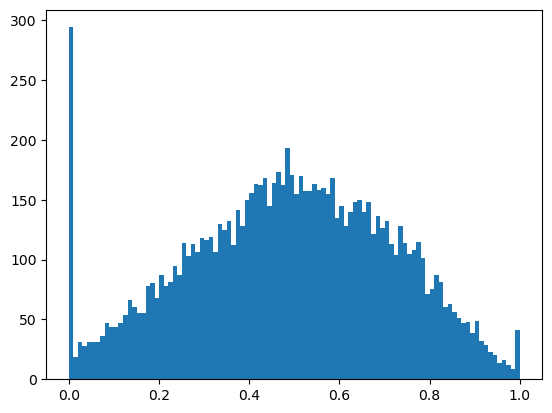

In [130]:
import matplotlib.pyplot as plt
final_grades = []
for eg in res:
    final_grades.append(eg[1][-1])

plt.hist(final_grades, bins=100)
plt.savefig('self_control'), 